SMAIL AGHILAS Rnn avec lstm

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import datetime

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train_data = pd.read_csv('DailyDelhiClimateTrain.csv')
test_data = pd.read_csv('DailyDelhiClimateTest.csv')

In [3]:
train_data['date'] = pd.to_datetime(train_data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])

In [4]:
def Visualize(kind='hist',figsize=(10,10)):
    def Col():
        cols = ['meantemp','humidity','wind_speed','meanpressure']
        for c in cols:
            yield c

    fig,axes = plt.subplots(nrows=2,ncols=2,figsize=figsize)
    col = Col()
    for i in range(2):
        for j in range(2):
            curr = next(col)
            if kind == 'hist':
                axes[i,j].hist(train_data[curr])
            elif kind == 'plot':
                axes[i,j].plot(train_data['date'],train_data[curr])
                plt.gcf().autofmt_xdate()
            axes[i,j].set_title(curr)
    if kind=='hist':
        plt.savefig('data_hist.png')
    else:
        plt.savefig('data_plot.png')

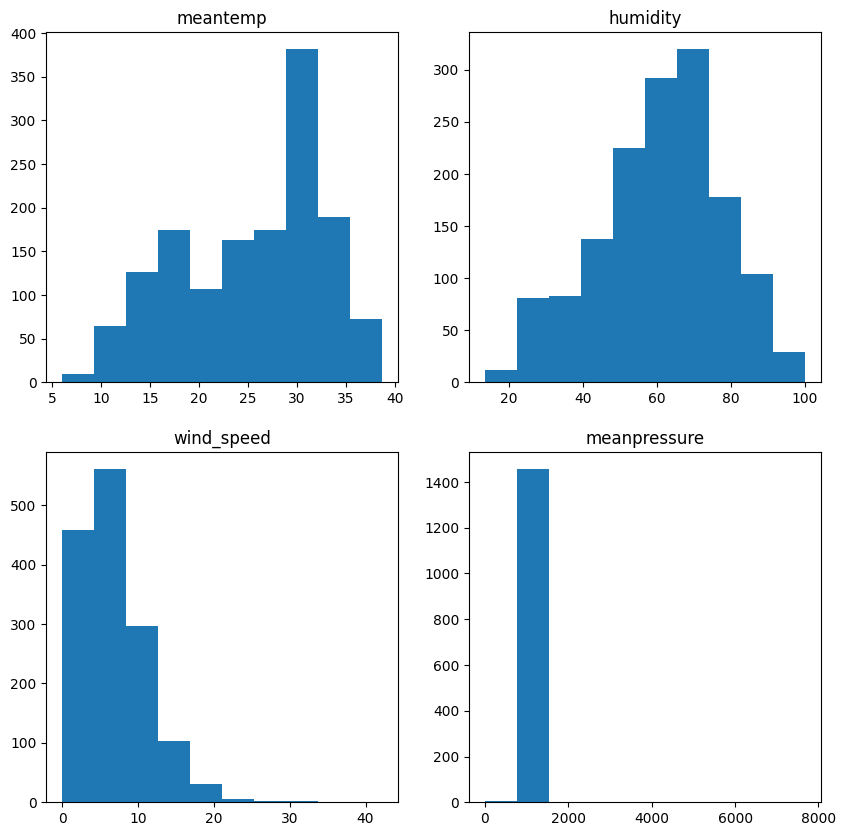

In [5]:
Visualize('hist')

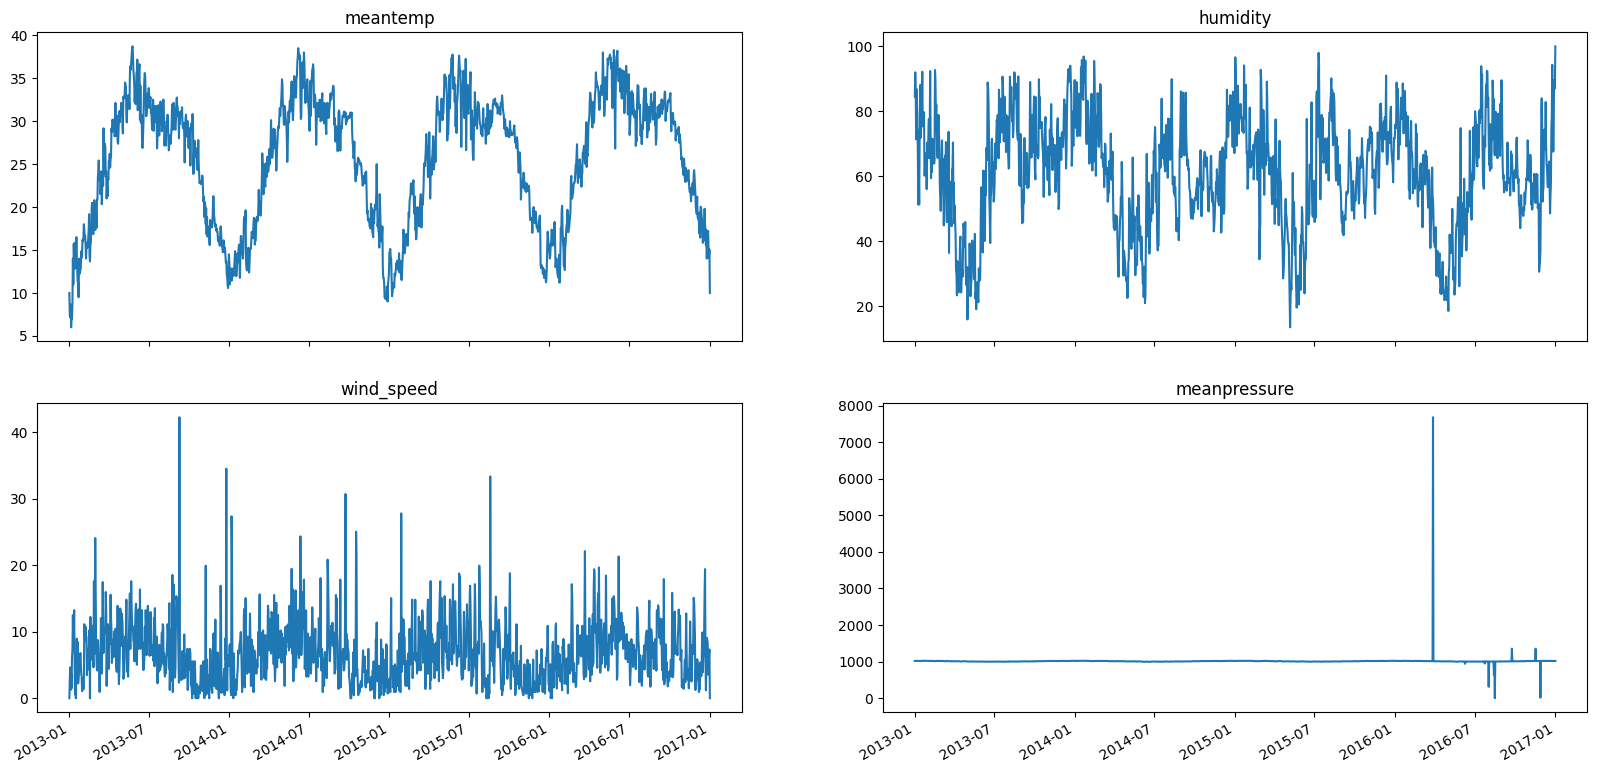

In [6]:
Visualize('plot',(20,10))

In [7]:
def process_data(data):
    x,y = [],[]
    switch = False
    
    if len(data)%2 == 1:
        last = False
    else:
        last = True
    
    for i in range(len(data)):
        if i == len(data)-1:
            if not last:
                break
        if switch:
            y.append(data[i])
            switch = False
        else:
            x.append(data[i])
            switch = True
    
    def reshape(d):
        d = np.array(d)
        d = np.reshape(d,(d.shape[0],1,1))
        return d
    return (reshape(x),np.array(y))

In [8]:
x_train_meantemp,y_train_meantemp = process_data(train_data.meantemp)
x_test_meantemp,y_test_meantemp = process_data(test_data.meantemp)

In [9]:
x_train_humidity,y_train_humidity = process_data(train_data.humidity)
x_test_humidity,y_test_humidity = process_data(test_data.humidity)

In [10]:
x_train_wind_speed,y_train_wind_speed = process_data(train_data.wind_speed)
x_test_wind_speed,y_test_wind_speed = process_data(test_data.wind_speed)

In [11]:
x_train_meanpressure,y_train_meanpressure = process_data(train_data.meanpressure)
x_test_meanpressure,y_test_meanpressure = process_data(test_data.meanpressure)

In [12]:
model_meantemp = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [13]:
model_humidity = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1)
])

In [14]:
model_wind_speed = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(1)
])

In [15]:
model_meanpressure = keras.Sequential([
    keras.layers.LSTM(8,input_shape=(1,1,)),
    keras.layers.Dense(16,activation='tanh'),
    keras.layers.Dense(32,activation='tanh'),
    keras.layers.Dense(64,activation='tanh'),
    keras.layers.Dense(1)
])

In [16]:
model_meantemp.compile(loss='mse',optimizer='adam')

In [17]:
model_humidity.compile(loss='mse',optimizer='adam')

In [18]:
model_wind_speed.compile(loss='mse',optimizer='adam')

In [19]:
model_meanpressure.compile(loss='mse',optimizer='adam')

In [20]:
model_meantemp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1041 (4.07 KB)
Trainable params: 1041 (4.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
os.makedirs('logs',exist_ok=True)
logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))

In [22]:
callback = keras.callbacks.TensorBoard(logdir)
earlyStoping = keras.callbacks.EarlyStopping(monitor='loss',patience=3)

In [34]:
history_humidity = model_humidity.fit(x_train_humidity,y_train_humidity,epochs=30,verbose=2,batch_size=16)

Epoch 1/30
46/46 - 0s - loss: 63.3745 - 70ms/epoch - 2ms/step
Epoch 2/30
46/46 - 0s - loss: 62.7297 - 56ms/epoch - 1ms/step
Epoch 3/30
46/46 - 0s - loss: 63.2565 - 52ms/epoch - 1ms/step
Epoch 4/30
46/46 - 0s - loss: 62.4086 - 52ms/epoch - 1ms/step
Epoch 5/30
46/46 - 0s - loss: 63.0503 - 52ms/epoch - 1ms/step
Epoch 6/30
46/46 - 0s - loss: 64.3760 - 51ms/epoch - 1ms/step
Epoch 7/30
46/46 - 0s - loss: 62.5017 - 53ms/epoch - 1ms/step
Epoch 8/30
46/46 - 0s - loss: 62.1336 - 52ms/epoch - 1ms/step
Epoch 9/30
46/46 - 0s - loss: 62.3222 - 52ms/epoch - 1ms/step
Epoch 10/30
46/46 - 0s - loss: 62.9610 - 53ms/epoch - 1ms/step
Epoch 11/30
46/46 - 0s - loss: 62.8082 - 53ms/epoch - 1ms/step
Epoch 12/30
46/46 - 0s - loss: 62.6337 - 52ms/epoch - 1ms/step
Epoch 13/30
46/46 - 0s - loss: 64.7235 - 52ms/epoch - 1ms/step
Epoch 14/30
46/46 - 0s - loss: 63.0946 - 52ms/epoch - 1ms/step
Epoch 15/30
46/46 - 0s - loss: 63.7238 - 53ms/epoch - 1ms/step
Epoch 16/30
46/46 - 0s - loss: 63.6788 - 52ms/epoch - 1ms/step
E

In [35]:
history_meantemp = model_meantemp.fit(x_train_meantemp,y_train_meantemp,epochs=100,verbose=2,batch_size=16)

Epoch 1/100
46/46 - 0s - loss: 2.7304 - 59ms/epoch - 1ms/step
Epoch 2/100
46/46 - 0s - loss: 2.7394 - 56ms/epoch - 1ms/step
Epoch 3/100
46/46 - 0s - loss: 2.7135 - 55ms/epoch - 1ms/step
Epoch 4/100
46/46 - 0s - loss: 2.7645 - 55ms/epoch - 1ms/step
Epoch 5/100
46/46 - 0s - loss: 2.6513 - 55ms/epoch - 1ms/step
Epoch 6/100
46/46 - 0s - loss: 2.7350 - 55ms/epoch - 1ms/step
Epoch 7/100
46/46 - 0s - loss: 2.6169 - 76ms/epoch - 2ms/step
Epoch 8/100
46/46 - 0s - loss: 2.6777 - 56ms/epoch - 1ms/step
Epoch 9/100
46/46 - 0s - loss: 2.6009 - 58ms/epoch - 1ms/step
Epoch 10/100
46/46 - 0s - loss: 2.6491 - 60ms/epoch - 1ms/step
Epoch 11/100
46/46 - 0s - loss: 2.7148 - 63ms/epoch - 1ms/step
Epoch 12/100
46/46 - 0s - loss: 2.7694 - 60ms/epoch - 1ms/step
Epoch 13/100
46/46 - 0s - loss: 2.7161 - 66ms/epoch - 1ms/step
Epoch 14/100
46/46 - 0s - loss: 2.6884 - 65ms/epoch - 1ms/step
Epoch 15/100
46/46 - 0s - loss: 2.7978 - 65ms/epoch - 1ms/step
Epoch 16/100
46/46 - 0s - loss: 2.7708 - 62ms/epoch - 1ms/step
E

In [36]:
history_wind_speed = model_wind_speed.fit(x_train_wind_speed,y_train_wind_speed,epochs=100,verbose=2,batch_size=16)

Epoch 1/100
46/46 - 0s - loss: 16.1692 - 64ms/epoch - 1ms/step
Epoch 2/100
46/46 - 0s - loss: 16.2941 - 59ms/epoch - 1ms/step
Epoch 3/100
46/46 - 0s - loss: 16.1787 - 57ms/epoch - 1ms/step
Epoch 4/100
46/46 - 0s - loss: 16.1657 - 53ms/epoch - 1ms/step
Epoch 5/100
46/46 - 0s - loss: 16.1589 - 54ms/epoch - 1ms/step
Epoch 6/100
46/46 - 0s - loss: 16.0860 - 55ms/epoch - 1ms/step
Epoch 7/100
46/46 - 0s - loss: 16.1459 - 54ms/epoch - 1ms/step
Epoch 8/100
46/46 - 0s - loss: 16.1372 - 54ms/epoch - 1ms/step
Epoch 9/100
46/46 - 0s - loss: 16.2488 - 57ms/epoch - 1ms/step
Epoch 10/100
46/46 - 0s - loss: 16.0379 - 65ms/epoch - 1ms/step
Epoch 11/100
46/46 - 0s - loss: 16.1116 - 65ms/epoch - 1ms/step
Epoch 12/100
46/46 - 0s - loss: 16.2766 - 63ms/epoch - 1ms/step
Epoch 13/100
46/46 - 0s - loss: 16.1868 - 64ms/epoch - 1ms/step
Epoch 14/100
46/46 - 0s - loss: 16.0208 - 64ms/epoch - 1ms/step
Epoch 15/100
46/46 - 0s - loss: 16.1630 - 63ms/epoch - 1ms/step
Epoch 16/100
46/46 - 0s - loss: 16.1798 - 66ms/ep

In [37]:
history_meanpressure = model_meanpressure.fit(x_train_meanpressure,y_train_meanpressure,epochs=500,verbose=2,batch_size=16)

Epoch 1/500


46/46 - 0s - loss: 3659.0117 - 59ms/epoch - 1ms/step
Epoch 2/500
46/46 - 0s - loss: 3658.9282 - 63ms/epoch - 1ms/step
Epoch 3/500
46/46 - 0s - loss: 3659.0076 - 53ms/epoch - 1ms/step
Epoch 4/500
46/46 - 0s - loss: 3658.6099 - 61ms/epoch - 1ms/step
Epoch 5/500
46/46 - 0s - loss: 3658.9497 - 59ms/epoch - 1ms/step
Epoch 6/500
46/46 - 0s - loss: 3658.7834 - 54ms/epoch - 1ms/step
Epoch 7/500
46/46 - 0s - loss: 3658.9104 - 55ms/epoch - 1ms/step
Epoch 8/500
46/46 - 0s - loss: 3659.2378 - 54ms/epoch - 1ms/step
Epoch 9/500
46/46 - 0s - loss: 3658.6858 - 54ms/epoch - 1ms/step
Epoch 10/500
46/46 - 0s - loss: 3658.7886 - 55ms/epoch - 1ms/step
Epoch 11/500
46/46 - 0s - loss: 3658.6665 - 54ms/epoch - 1ms/step
Epoch 12/500
46/46 - 0s - loss: 3659.8174 - 56ms/epoch - 1ms/step
Epoch 13/500
46/46 - 0s - loss: 3659.1851 - 57ms/epoch - 1ms/step
Epoch 14/500
46/46 - 0s - loss: 3659.7126 - 66ms/epoch - 1ms/step
Epoch 15/500
46/46 - 0s - loss: 3659.3679 - 67ms/epoch - 1ms/step
Epoch 16/500
46/46 - 0s - loss:

In [48]:
def Gen_hist():
    all_hist = ['history_humidity','history_meanpressure','history_meantemp','history_wind_speed']
    for hist in all_hist:
        yield hist

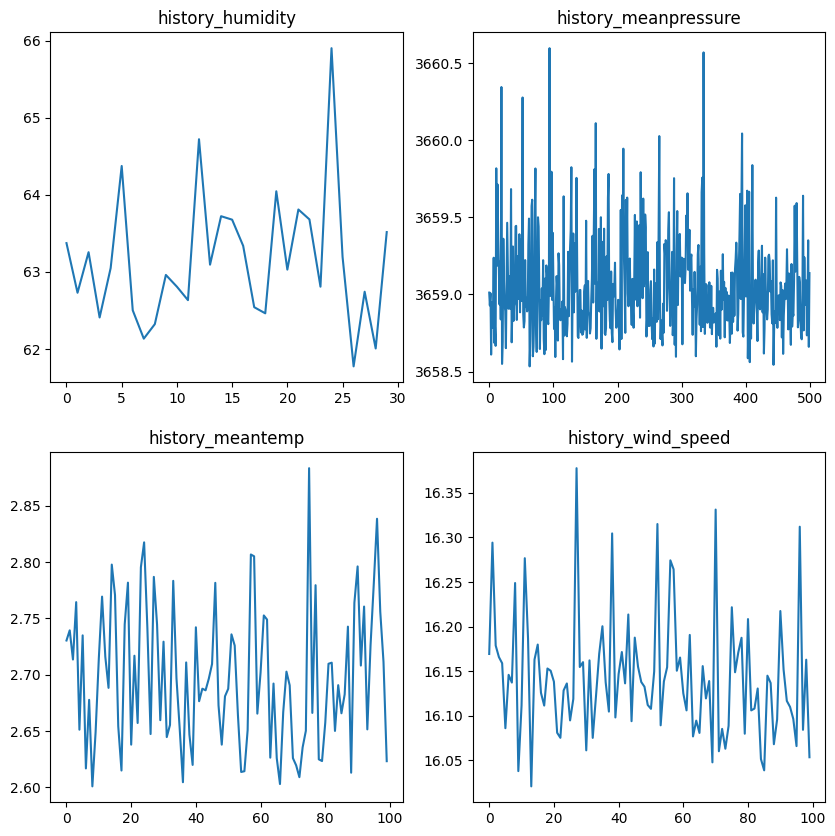

In [49]:
gen_hist = Gen_hist()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
for i in range(2):
    for j in range(2):
        hist_now = next(gen_hist)
        axes[i,j].plot(eval(hist_now).history['loss'])
        axes[i,j].set_title(hist_now)
plt.savefig('loss_history.png')

In [50]:
def Gen_test():
    all_test = ['x_test_wind_speed','x_test_humidity','x_test_meantemp','x_test_meanpressure']
    all_y = ['y_test_wind_speed','y_test_humidity','y_test_meantemp','y_test_meanpressure']
    all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
    for test in zip(all_test,all_y,all_model):
        yield test

2/2 [==============================] - 0s 2ms/step


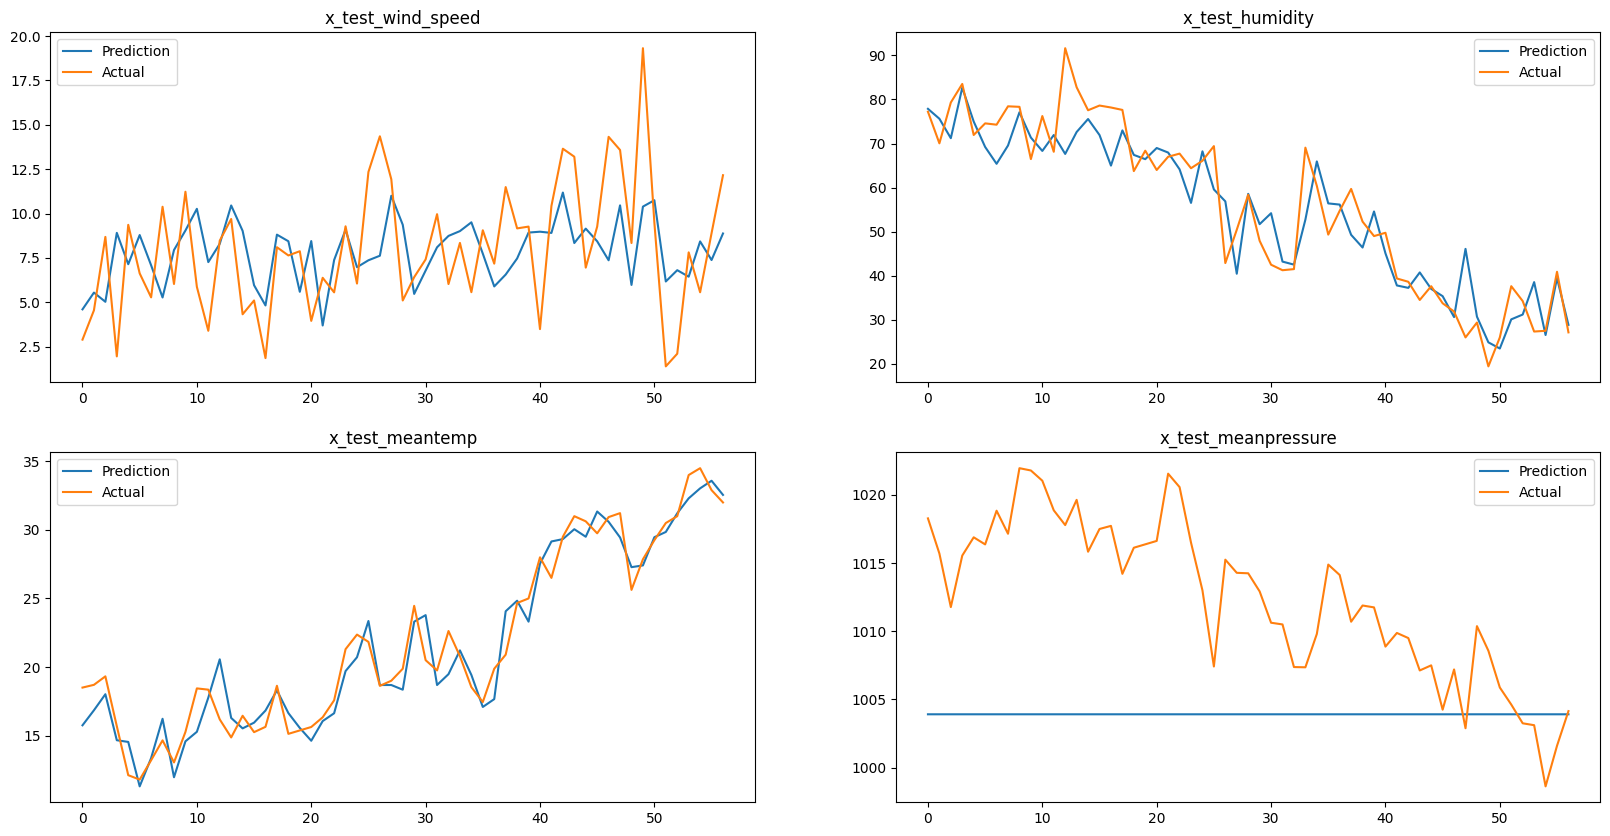

In [51]:
gen_test = Gen_test()
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(20,10))
for i in range(2):
    for j in range(2):
        test_now = next(gen_test)
        axes[i,j].plot(eval(test_now[2]).predict(eval(test_now[0])),label='Prediction')
        axes[i,j].plot(eval(test_now[1]),label='Actual')
        axes[i,j].set_title(test_now[0])
        axes[i,j].legend()
plt.savefig('prediction.png')

In [42]:
os.makedirs('models',exist_ok=True)

In [43]:
all_model = ['model_wind_speed','model_humidity','model_meantemp','model_meanpressure']
for model in all_model:
    eval(model).save(f'models/{model}.h5')

c:\Users\aghil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
